<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#matplotlib-描画訓練ノート" data-toc-modified-id="matplotlib-描画訓練ノート-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>matplotlib 描画訓練ノート</a></span></li><li><span><a href="#軸の任意の書式の実現" data-toc-modified-id="軸の任意の書式の実現-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>軸の任意の書式の実現</a></span></li><li><span><a href="#Jupyter-Notebook-拡張機能：スニペットの実験" data-toc-modified-id="Jupyter-Notebook-拡張機能：スニペットの実験-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Jupyter Notebook 拡張機能：スニペットの実験</a></span></li><li><span><a href="#カラーマップ" data-toc-modified-id="カラーマップ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>カラーマップ</a></span><ul class="toc-item"><li><span><a href="#等高線でカラーマップを見る事例" data-toc-modified-id="等高線でカラーマップを見る事例-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>等高線でカラーマップを見る事例</a></span></li><li><span><a href="#カラーマップ一覧を表示する" data-toc-modified-id="カラーマップ一覧を表示する-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>カラーマップ一覧を表示する</a></span></li></ul></li></ul></div>

# matplotlib 描画訓練ノート
個別実装例を集めるノートである。ある程度、実装例がたまったら整理して体系化したノートにする。

# 軸の任意の書式の実現
matplotlib.ticker.FuncFormatter 関数を使うと便利である。  
https://matplotlib.org/api/ticker_api.html?highlight=funcformatter#matplotlib.ticker.FuncFormatter

以下の説明にあるように、二つの引数(x,y)を受け取る点に注意。
> Use a user-defined function for formatting.
> The function should take in two inputs (a tick value x and a position pos), and return a string containing the corresponding tick label.

以下の実装例では、unixtimestamp のリストを正規乱数分布に従って生成し、そのヒストグラムを描画している。  
Xの値は unixtimestamp なので、それを datetime.datetime.fromtimestamp() で datetime型に変換し、strftime() で書式を整形している。  
取引が集中している時間帯のヒストグラム描画(x軸＝取引時間)の場合には、FuncFormatter が役に立つ。

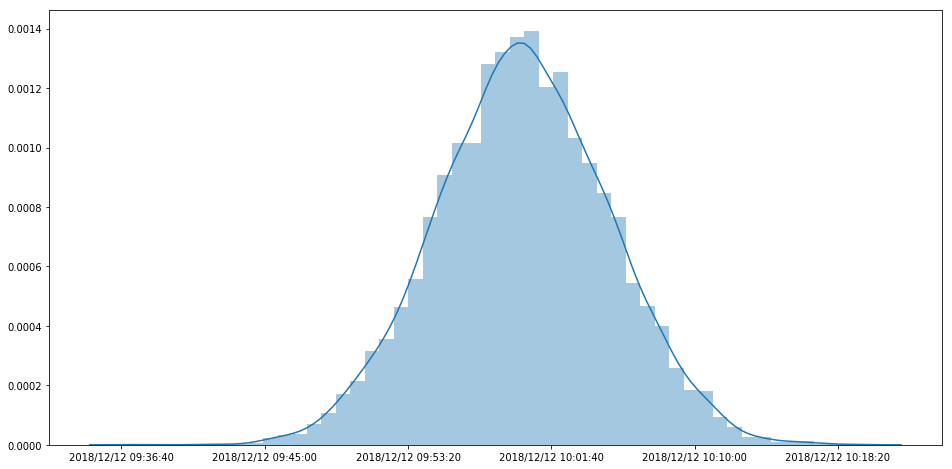

In [7]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from numpy.random import randn,randint,normal
import seaborn as sns
from dateutil.parser import parse

# base_time を中心に、σ=300(sec) の正規乱数分布のunixtimestamp を生成する。
base_time = parse('2018-12-12 10:00:00')
base_time.timestamp()
time_series = normal(base_time.timestamp(), 300, size=(10000))

plt.figure(figsize=(16,8))
ax = sns.distplot(time_series, bins=50, kde=True)

# x,y の二つの引数を受け取る点に注意
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,y:datetime.datetime.fromtimestamp(x).strftime('%Y/%m/%d %H:%M:%S')))
plt.show()

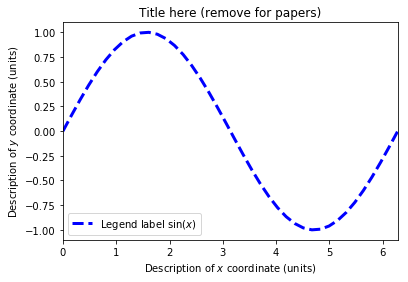

In [5]:
# Silly example data
bp_x = np.linspace(0, 2*np.pi, num=40, endpoint=True)
bp_y = np.sin(bp_x)

# Make the plot
plt.plot(bp_x, bp_y, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Title here (remove for papers)")
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
plt.legend(loc="lower left")
plt.show()

# Jupyter Notebook 拡張機能：スニペットの実験
以下、スニペットからコピペしたコードである。  
結構使えそうなスニペットが多い。

In [4]:
import os
import sys
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

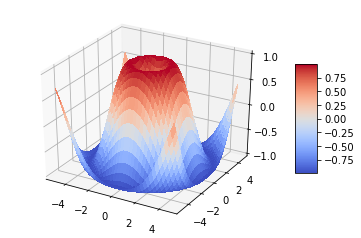

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Silly example data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Make the plot
fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

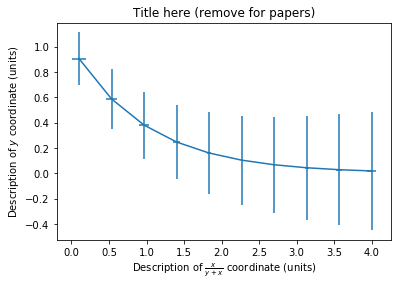

In [24]:
# Silly example data
x = np.linspace(0.1, 4, num=10)
y = np.exp(-x)
dx = 0.1 - x/25.0
dy = 0.2 + x/15.0

# Make the plot
plt.figure()
plt.errorbar(x, y, xerr=dx, yerr=dy)
plt.title(r"Title here (remove for papers)")

# 数式を埋め込むことができる。
#plt.xlabel(r"Description of $\frac{x}{y+x}$ coordinate (units)")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.show()

In [ ]:
[x**2 for x in range(-10, 11) if (x%3)==0]

In [ ]:
class BPSomeClass(object):
    """Brief class description
    
    Some more extensive description
    
    Attributes
    ----------
    attr1 : string
        Purpose of attr1.
    attr2 : float
        Purpose of attr2.
    
    """
    
    def __init__(self, param1, param2, param3=0):
        """Example of docstring on the __init__ method.
        
        Parameters
        ----------
        param1 : str
            Description of `param1`.
        param2 : float
            Description of `param2`.
        param3 : int, optional
            Description of `param3`, defaults to 0.
        
        """
        self.attr1 = param1
        self.attr2 = param2
        print(param3 // 4)
    
    @property
    def attribute2(self):
        return self.attr2
    
    @attribute2.setter
    def attribute2(self, new_attr2):
        if not isinstance(float, new_attr2):
            raise ValueError("attribute2 must be a float, not {0}".format(new_attr2))
        self.attr2 = new_attr2


bp_obj = BPSomeClass("a", 1.618)
print(bp_obj.attribute2)
bp_obj.attribute2 = 3.236


In [ ]:
<table>
  <tr>
    <th>Header 1</th>
    <th>Header 2</th>
  </tr>
  <tr>
    <td>row 1, cell 1</td>
    <td>row 1, cell 2</td>
  </tr>
  <tr>
    <td>row 2, cell 1</td>
    <td>row 2, cell 2</td>
  </tr>
</table>

In [ ]:
@numba.njit
def bp_func(x):
    r"""Some function
    
    Does some stuff.
    
    """
    return x**2

# カラーマップ
参考: http://pynote.hatenablog.com/entry/matplotlib-color

## 等高線でカラーマップを見る事例

matplotlib で等高線を描画するのは contour()。  
参照:http://ailaby.com/contour/

contour() の第４引数は、等高線の間隔であり、数字が大きいほど密な等高線になる。


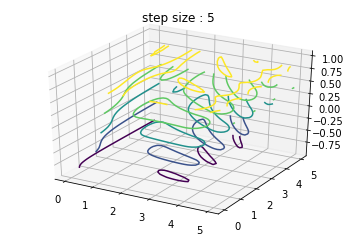

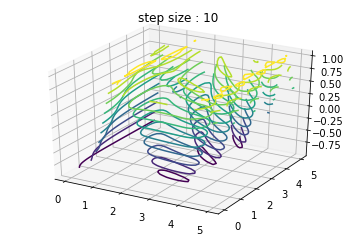

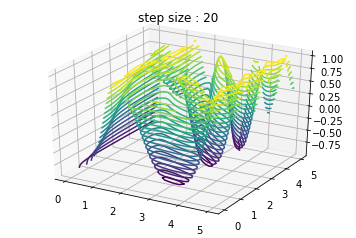

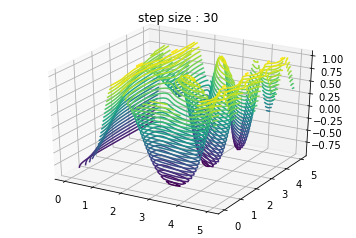

In [25]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# 関数の入力を作成する。
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)

# 関数の値を計算する。
Z = f(X, Y)

# 等高線を可視化する。
# 第４引数は等高線の間隔数。
for _levels in [5,10,20,30]:

    # 以下の設定をすると3次元描画が出来る
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    plt.contour(X, Y, Z, _levels, cmap='viridis')
    plt.title("step size : {}".format(_levels))
    plt.show()


## カラーマップ一覧を表示する


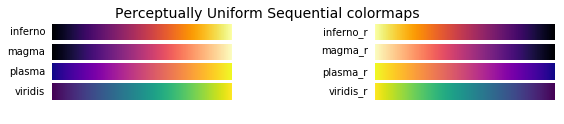

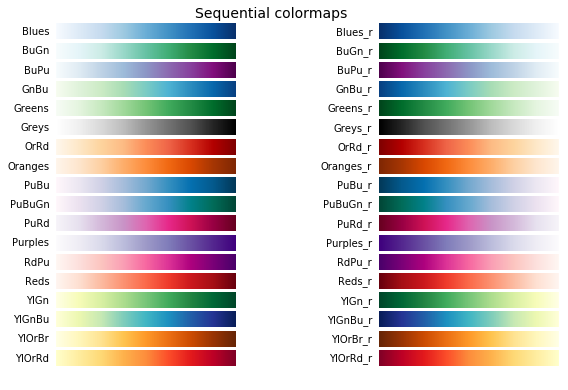

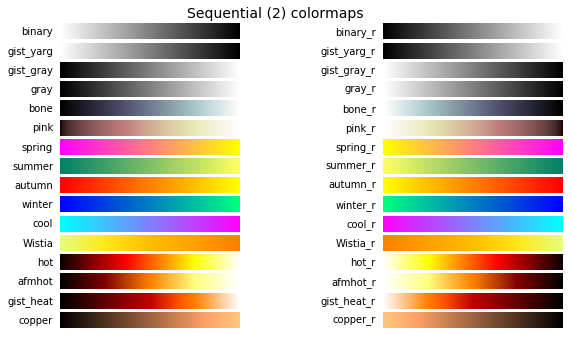

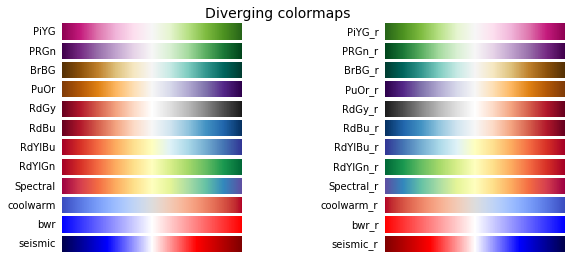

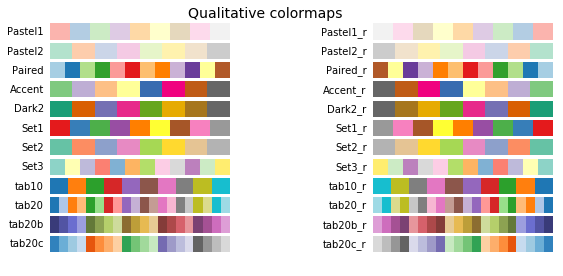

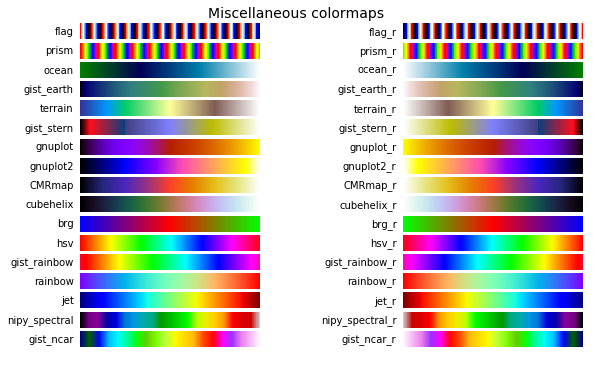

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

cmaps['Perceptually Uniform Sequential'] = [
    'inferno', 'magma', 'plasma', 'viridis']

cmaps['Sequential'] = [
    'Blues', 'BuGn', 'BuPu', 'GnBu',
    'Greens', 'Greys', 'OrRd', 'Oranges',
    'PuBu', 'PuBuGn', 'PuRd', 'Purples',
    'RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']

cmaps['Sequential (2)'] = [
    'binary', 'gist_yarg', 'gist_gray', 'gray',
    'bone', 'pink', 'spring', 'summer',
    'autumn', 'winter', 'cool', 'Wistia',
    'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
    'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
    'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Qualitative'] = [
    'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
    'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot',
    'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv', 'gist_rainbow', 'rainbow',
    'jet', 'nipy_spectral', 'gist_ncar']

# 表示するデータとして 0 ～ 1.0 を 256分割した配列を作る
gradient = np.linspace(0, 1, 256).reshape(1, -1)

def plot_color_maps(cmap_category, cmap_list):
    num_cmaps = len(cmap_list)
    
    # 各グループに属するカラーマップの数だけ、axis を作る。
    # レギュラーなものと、リバースのものを作るので列は２つ。
    # ax のサイズは、カラーマップ数で調節している。
    fig, axes = plt.subplots(num_cmaps, 2, figsize=(9, num_cmaps * 0.35))
    fig.subplots_adjust(wspace=0.8)
    axes[0][0].set_title(cmap_category + ' colormaps', fontsize=14, x=1.2)
    
    def plot_color_map(ax, gradient, name):
        # aspect = "auto" にすると、axis を縦に埋めるように描画する
        ax.imshow(gradient, aspect='auto', cmap=name)
        
        # aspect = "equal" にすると、gradientのshape通りに、1ピクセルの細長い画像になってしまう。
        # ax.imshow(gradient, aspect='equal', cmap=name)
        
        # set_axis_off() を実行しないと、軸が描画されてグラデーションが見づらくなってしまう。
        ax.set_axis_off()
        ax.text(-10, 0, name, va='center', ha='right', fontsize=10)
    
    for [axL, axR], name in zip(axes, cmap_list):
        # 各行のax のうち、左側にはレギュラーを、右側にはリバースを置く
        plot_color_map(axL, gradient, name)
        
        # "_r" を接尾辞とすると、グラデーションの向きが逆になる
        plot_color_map(axR, gradient, name + '_r')

for cmap_category, cmap_list in cmaps.items():
    plot_color_maps(cmap_category, cmap_list)

plt.show()